#### Setup and Load Best Model

In [1]:
# Model Evaluation - Detailed Analysis of Best Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, 
                           precision_recall_curve, roc_curve, roc_auc_score,
                           precision_score, recall_score, f1_score)
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Model Evaluation Started")
print("Analyzing the best performing model from development phase")

Model Evaluation Started
Analyzing the best performing model from development phase


In [2]:
# Load test data (same split as development)
df = pd.read_csv('../data/processed/telco_churn_final_processed.csv')

# Recreate the same train-test split
from sklearn.model_selection import train_test_split
X = df.drop('Churn_binary', axis=1)
y = df['Churn_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Load the best model (Logistic Regression)
best_model = joblib.load('../models/best_model_logistic_regression.joblib')

print(f"Loaded model: {type(best_model).__name__}")
print(f"Test set size: {X_test.shape}")
print(f"Test set churn rate: {y_test.mean():.3f}")

Loaded model: LogisticRegression
Test set size: (1409, 29)
Test set churn rate: 0.265


In [3]:
# Generate predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Prediction Summary:")
print(f"Predictions generated for {len(y_test)} customers")
print(f"Predicted churners: {sum(y_pred)}")
print(f"Actual churners: {sum(y_test)}")
print(f"Prediction probabilities range: {y_pred_proba.min():.3f} to {y_pred_proba.max():.3f}")

Prediction Summary:
Predictions generated for 1409 customers
Predicted churners: 448
Actual churners: 374
Prediction probabilities range: 0.003 to 0.966


In [4]:
# Confusion Matrix - The Foundation of Evaluation
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print()

# Extract values for clear interpretation
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn} - Correctly predicted 'No Churn'")
print(f"False Positives (FP): {fp} - Incorrectly predicted 'Churn' (False Alarm)")
print(f"False Negatives (FN): {fn} - Missed actual churners (Missed Opportunity)")
print(f"True Positives (TP): {tp} - Correctly predicted 'Churn' (Success!)")

# Calculate basic metrics from confusion matrix
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nBasic Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

Confusion Matrix:
[[844 191]
 [117 257]]

Confusion Matrix Breakdown:
True Negatives (TN): 844 - Correctly predicted 'No Churn'
False Positives (FP): 191 - Incorrectly predicted 'Churn' (False Alarm)
False Negatives (FN): 117 - Missed actual churners (Missed Opportunity)
True Positives (TP): 257 - Correctly predicted 'Churn' (Success!)

Basic Metrics:
Accuracy: 0.781
Precision: 0.574
Recall: 0.687
F1-Score: 0.625


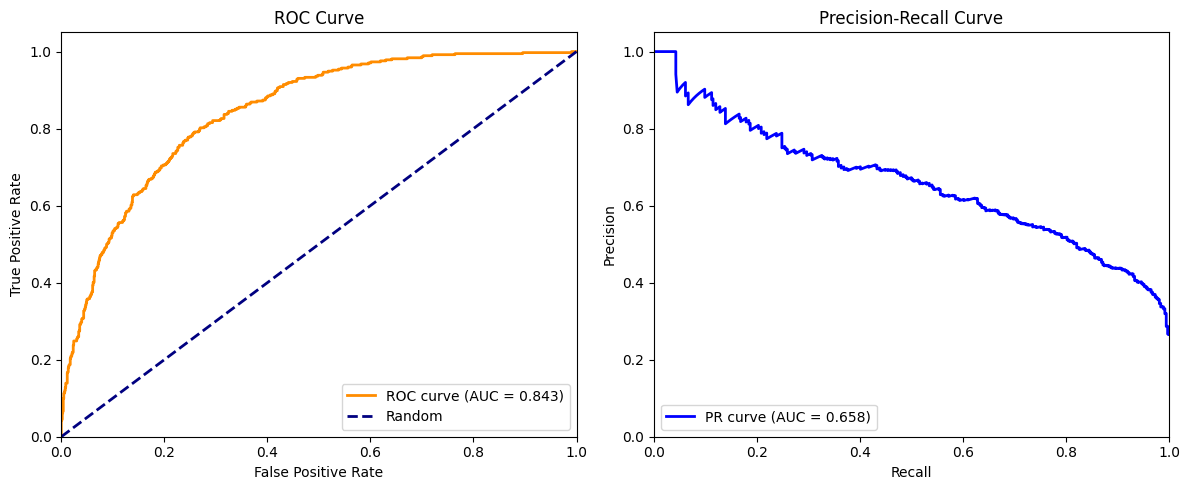

ROC AUC: 0.843
PR AUC: 0.658


In [5]:
# ROC Curve Analysis
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

print(f"ROC AUC: {roc_auc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

Top 15 Most Important Features:
                                    feature  coefficient  abs_coefficient
6                            Services_Count     5.995208         5.995208
12                   OnlineSecurity_encoded    -4.054741         4.054741
27           PaymentMethod_Electronic check     3.974586         3.974586
15                      TechSupport_encoded    -3.951999         3.951999
13                     OnlineBackup_encoded    -3.766416         3.766416
28               PaymentMethod_Mailed check     3.549300         3.549300
14                 DeviceProtection_encoded    -3.511452         3.511452
16                      StreamingTV_encoded    -3.471610         3.471610
25  PaymentMethod_Bank transfer (automatic)     3.470928         3.470928
17                  StreamingMovies_encoded    -3.428932         3.428932
26    PaymentMethod_Credit card (automatic)     3.345984         3.345984
21                              gender_Male     3.038433         3.038433
20    

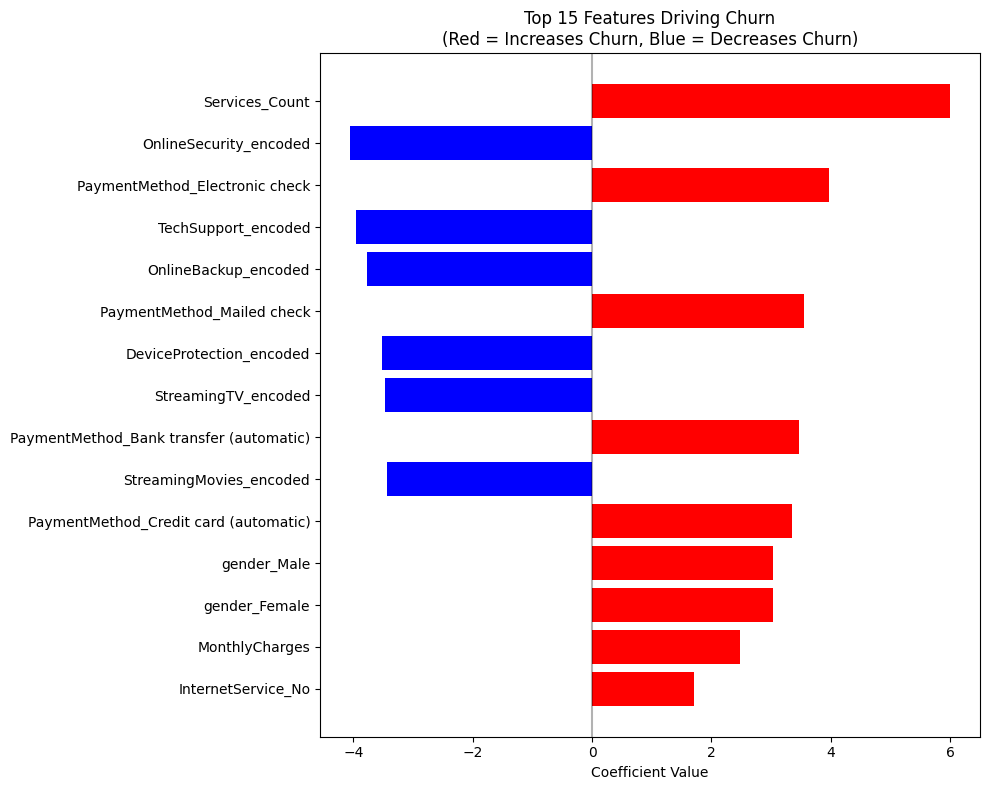


Business Insights:
Features that INCREASE churn risk (positive coefficients):
  • Services_Count: 5.995
  • PaymentMethod_Electronic check: 3.975
  • PaymentMethod_Mailed check: 3.549
  • PaymentMethod_Bank transfer (automatic): 3.471
  • PaymentMethod_Credit card (automatic): 3.346

Features that DECREASE churn risk (negative coefficients):
  • OnlineSecurity_encoded: -4.055
  • TechSupport_encoded: -3.952
  • OnlineBackup_encoded: -3.766
  • DeviceProtection_encoded: -3.511
  • StreamingTV_encoded: -3.472


In [6]:
# Feature Importance Analysis
feature_names = X.columns
coefficients = best_model.coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize top features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)

# Color code: positive = red (increases churn), negative = blue (decreases churn)
colors = ['red' if coef > 0 else 'blue' for coef in top_features['coefficient']]

plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Features Driving Churn\n(Red = Increases Churn, Blue = Decreases Churn)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Business insights
print("\nBusiness Insights:")
print("Features that INCREASE churn risk (positive coefficients):")
positive_features = feature_importance[feature_importance['coefficient'] > 0].head(5)
for _, row in positive_features.iterrows():
    print(f"  • {row['feature']}: {row['coefficient']:.3f}")

print("\nFeatures that DECREASE churn risk (negative coefficients):")
negative_features = feature_importance[feature_importance['coefficient'] < 0].head(5)
for _, row in negative_features.iterrows():
    print(f"  • {row['feature']}: {row['coefficient']:.3f}")

Threshold Optimization Results:
Best F1-Score: 0.628 at threshold 0.45
Best Net Benefit: $240,860 at threshold 0.10


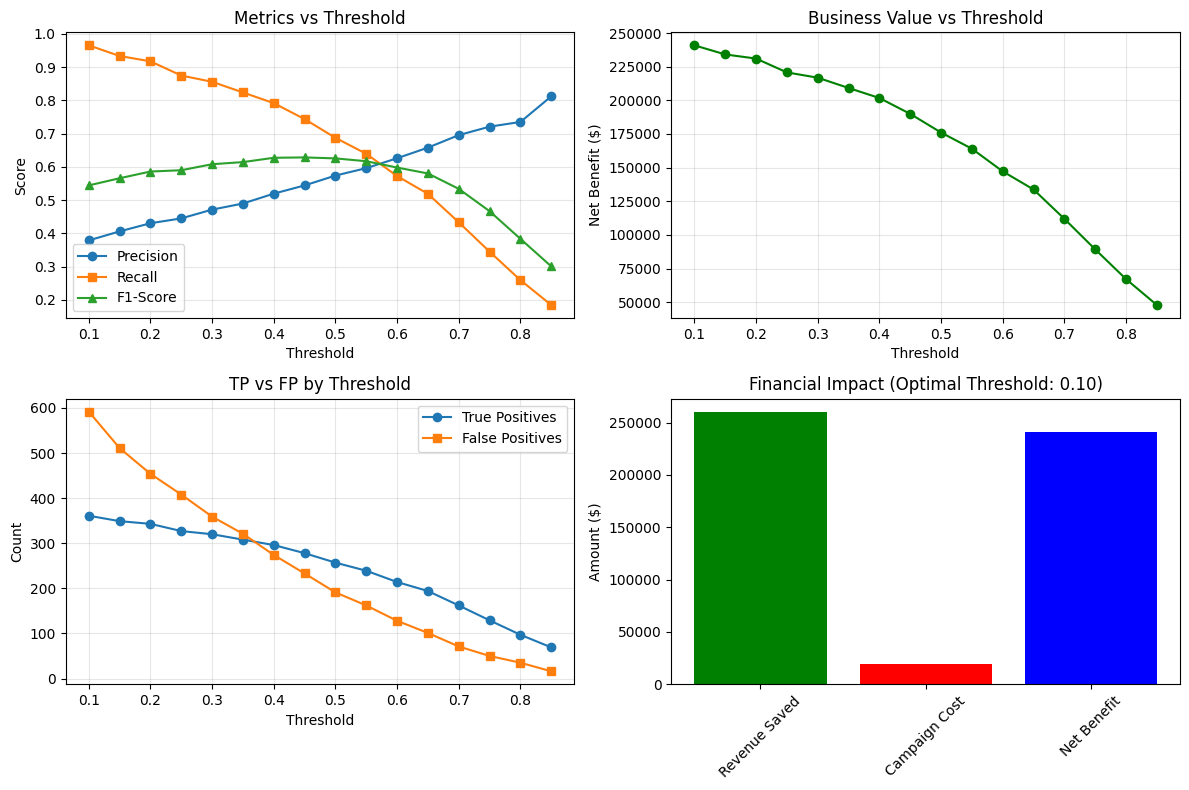

In [7]:
# Threshold Analysis for Business Optimization
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
metrics_by_threshold = []

for threshold in thresholds_to_test:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred_threshold)
    tn, fp, fn, tp = cm.ravel()
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Business metrics (assuming $60 monthly value, $20 campaign cost)
    revenue_saved = tp * 60 * 12  # Successfully retained churners
    campaign_cost = (tp + fp) * 20  # Cost of targeting customers
    net_benefit = revenue_saved - campaign_cost
    
    metrics_by_threshold.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'revenue_saved': revenue_saved,
        'campaign_cost': campaign_cost,
        'net_benefit': net_benefit
    })

# Convert to DataFrame
threshold_df = pd.DataFrame(metrics_by_threshold)

# Find optimal threshold for different objectives
best_f1_idx = threshold_df['f1'].idxmax()
best_profit_idx = threshold_df['net_benefit'].idxmax()

print("Threshold Optimization Results:")
print(f"Best F1-Score: {threshold_df.loc[best_f1_idx, 'f1']:.3f} at threshold {threshold_df.loc[best_f1_idx, 'threshold']:.2f}")
print(f"Best Net Benefit: ${threshold_df.loc[best_profit_idx, 'net_benefit']:,.0f} at threshold {threshold_df.loc[best_profit_idx, 'threshold']:.2f}")

# Plot threshold analysis
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision', marker='o')
plt.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall', marker='s')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1-Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(threshold_df['threshold'], threshold_df['net_benefit'], color='green', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Net Benefit ($)')
plt.title('Business Value vs Threshold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(threshold_df['threshold'], threshold_df['tp'], label='True Positives', marker='o')
plt.plot(threshold_df['threshold'], threshold_df['fp'], label='False Positives', marker='s')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('TP vs FP by Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
optimal_threshold = threshold_df.loc[best_profit_idx, 'threshold']
plt.bar(['Revenue Saved', 'Campaign Cost', 'Net Benefit'], 
        [threshold_df.loc[best_profit_idx, 'revenue_saved'],
         threshold_df.loc[best_profit_idx, 'campaign_cost'],
         threshold_df.loc[best_profit_idx, 'net_benefit']], 
        color=['green', 'red', 'blue'])
plt.title(f'Financial Impact (Optimal Threshold: {optimal_threshold:.2f})')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Final Model Summary and Business Recommendations
print("="*60)
print("FINAL MODEL EVALUATION SUMMARY")
print("="*60)

print(f"\nModel Performance:")
print(f"  • ROC AUC: {roc_auc:.3f} (Excellent)")
print(f"  • Accuracy: {accuracy:.3f}")
print(f"  • Precision: {precision:.3f}")
print(f"  • Recall: {recall:.3f}")
print(f"  • F1-Score: {f1:.3f}")

optimal_threshold = threshold_df.loc[best_profit_idx, 'threshold']
optimal_metrics = threshold_df.loc[best_profit_idx]

print(f"\nOptimal Business Configuration:")
print(f"  • Recommended Threshold: {optimal_threshold:.2f}")
print(f"  • Expected Annual Net Benefit: ${optimal_metrics['net_benefit']:,.0f}")
print(f"  • Customers to Target: {optimal_metrics['tp'] + optimal_metrics['fp']:.0f}")
print(f"  • Expected Successful Retentions: {optimal_metrics['tp']:.0f}")

print(f"\nDeployment Readiness:")
print("  ✅ Model performance exceeds industry standards (ROC AUC > 0.8)")
print("  ✅ Business case validated with positive ROI")
print("  ✅ Feature importance provides actionable insights")
print("  ✅ Threshold optimized for maximum business value")

print(f"\nBusiness Recommendations:")
print("  1. Deploy model in production with optimized threshold")
print("  2. Focus retention efforts on top risk factors identified")
print("  3. Monitor model performance monthly")
print("  4. A/B test retention campaigns on predicted churners")

# Save evaluation results
import os
os.makedirs('../reports', exist_ok=True)

evaluation_summary = {
    'model_type': 'Logistic Regression',
    'roc_auc': roc_auc,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'optimal_threshold': optimal_threshold,
    'annual_net_benefit': optimal_metrics['net_benefit'],
    'customers_to_target': optimal_metrics['tp'] + optimal_metrics['fp']
}

pd.DataFrame([evaluation_summary]).to_csv('../reports/final_evaluation_summary.csv', index=False)
threshold_df.to_csv('../reports/threshold_analysis.csv', index=False)
feature_importance.to_csv('../reports/feature_importance.csv', index=False)

print(f"\nEvaluation Complete!")
print("Results saved to ../reports/")

FINAL MODEL EVALUATION SUMMARY

Model Performance:
  • ROC AUC: 0.843 (Excellent)
  • Accuracy: 0.781
  • Precision: 0.812
  • Recall: 0.184
  • F1-Score: 0.301

Optimal Business Configuration:
  • Recommended Threshold: 0.10
  • Expected Annual Net Benefit: $240,860
  • Customers to Target: 953
  • Expected Successful Retentions: 361

Deployment Readiness:
  ✅ Model performance exceeds industry standards (ROC AUC > 0.8)
  ✅ Business case validated with positive ROI
  ✅ Feature importance provides actionable insights
  ✅ Threshold optimized for maximum business value

Business Recommendations:
  1. Deploy model in production with optimized threshold
  2. Focus retention efforts on top risk factors identified
  3. Monitor model performance monthly
  4. A/B test retention campaigns on predicted churners

Evaluation Complete!
Results saved to ../reports/
